In [1]:
from datetime import date, timedelta, datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns

import functions as f

# Wie ändert sich
    
    -   die Volatilität (Volatilität misst, wie stark und wie schnell sich der Kurs einer Anlage in einem bestimmten Zeitraum ändert.)
    -   Handelsvolumen

            abhängig von der Uhrzeit/Wochentag

### How have the bitcoin prices changed for the last 30 days

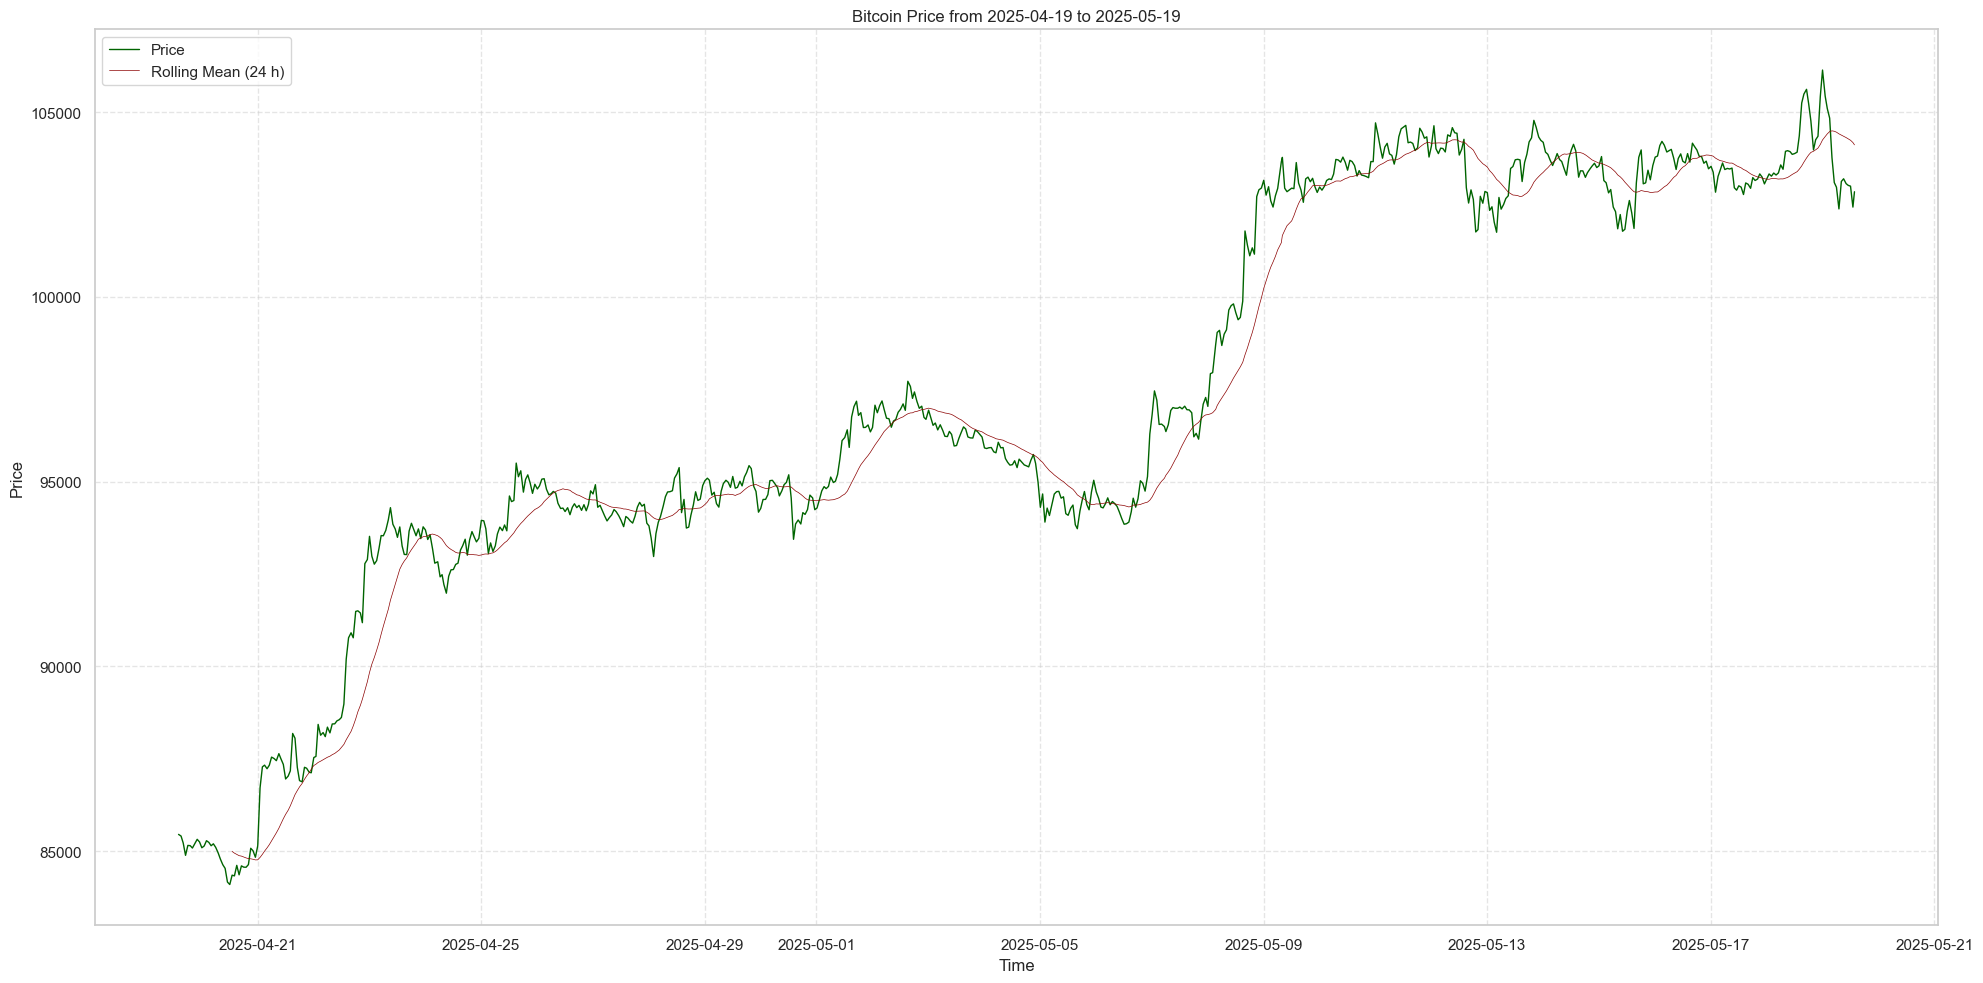

In [13]:
# Preisdiagramm

token = 'bitcoin'
days = 30
window = 24 # In diesem Zeitrahmen wird ein gleitender Durchschnitt berechnet.

df = f.parse_token_data(token, days)
df['rolling_price'] = df['price'].rolling(window=window).mean() # Berechnung des gleitenden Durchschnitts
df['date'] = df.index.date # Die Daten werden extrahiert, um sie auf der X-Achse anzuzeigen.

plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid", palette="muted", font_scale=1)
sns.lineplot(x=df.index, y=df['price'], label="Price", linewidth=1, color='darkgreen') # Preis
sns.lineplot(x=df.index, y=df['rolling_price'], label=f"Rolling Mean ({window} h)", linewidth=0.5, color='darkred') # Gleitender Durchschnitt
plt.title(f'{token.capitalize()} Price from {df.index[0].date()} to {df.index[-1].date()}')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True, linestyle = '--', alpha=0.5)
plt.tight_layout()
plt.show()

Der Bitcoin-Preischart hatte im letzten Monat mehrere Höhen und Tiefen, was heute zu einem Preis von rund 103.000 führte. 

### Wie sieht die wöchentliche Bitcoin-Volatility?

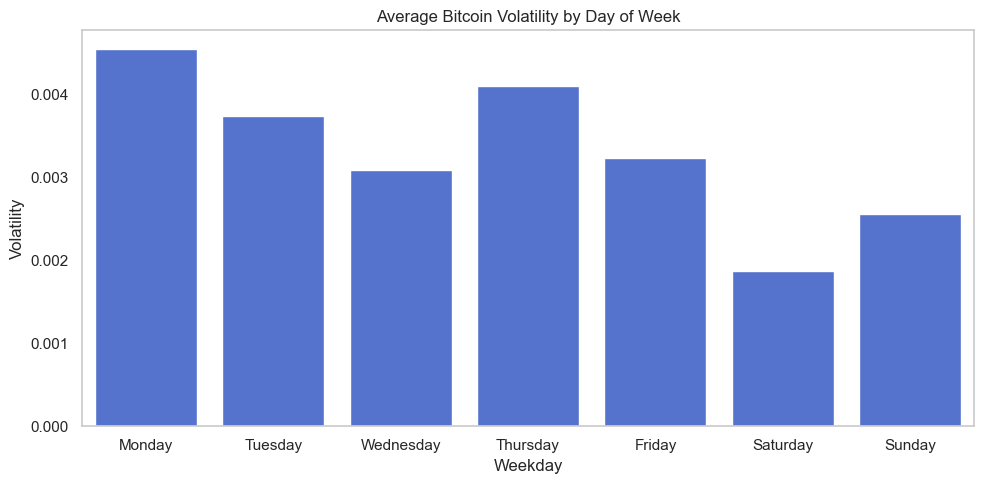

In [14]:
# Volatilität nach Wochentag

token = 'bitcoin'
days = 30

volatility_df = f.calculate_volatility(token, days)

# Volatilität wird nach Wochentag gruppiert:
grouped = volatility_df.groupby('weekday', observed=True)['volatility'].mean().reset_index()

sns.set_theme(style='whitegrid', palette='bright', font_scale=1)
plt.figure(figsize=(10,5))
sns.barplot(data=grouped, x='weekday', y='volatility', color='royalblue') # Es wird ein Balkendiagramm erstellt.
plt.title(f'Average {token.capitalize()} Volatility by Day of Week')
plt.xlabel('Weekday')
plt.ylabel('Volatility')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Innerhalb einer Woche erreicht die Volatilität am Montag und Donnerstag ihre höchsten Werte, während am Samstag dieser Wert minimal ist

### Wie hat die Bitcoin Volumen sich innerhalb letzte 365 Tage geändert?

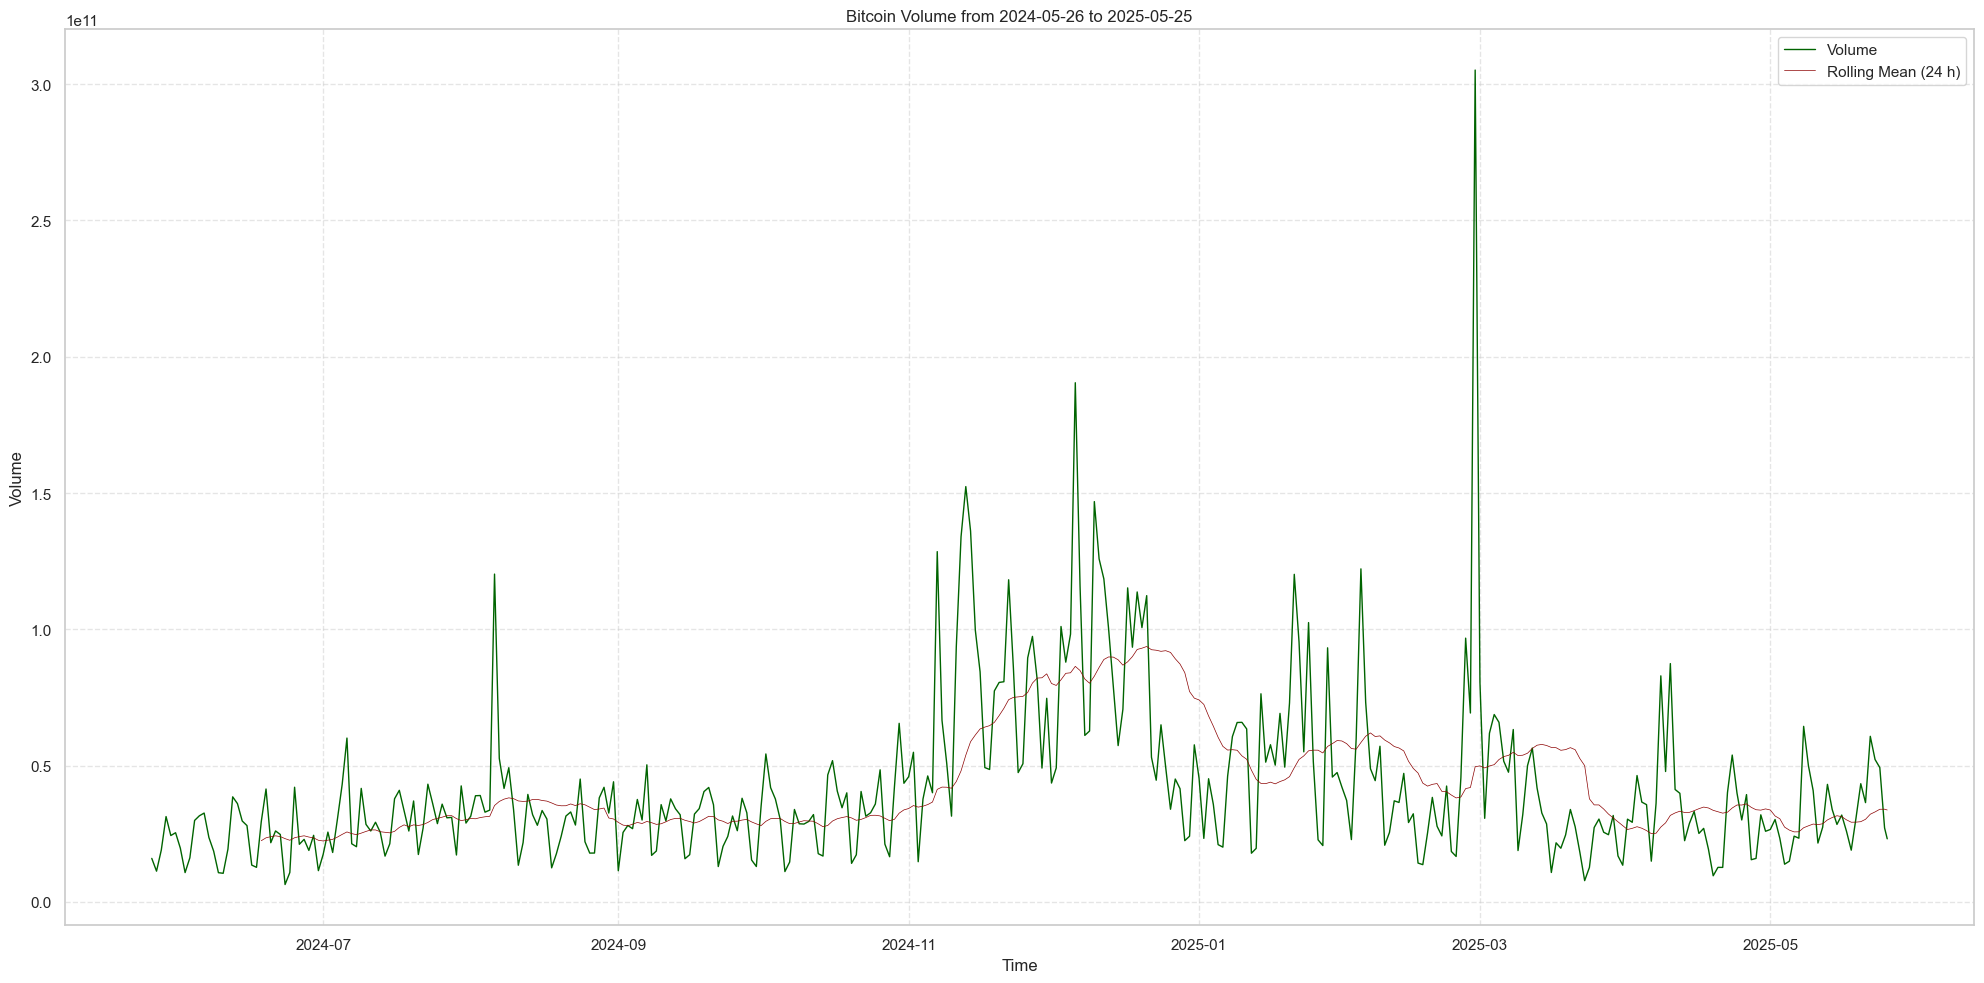

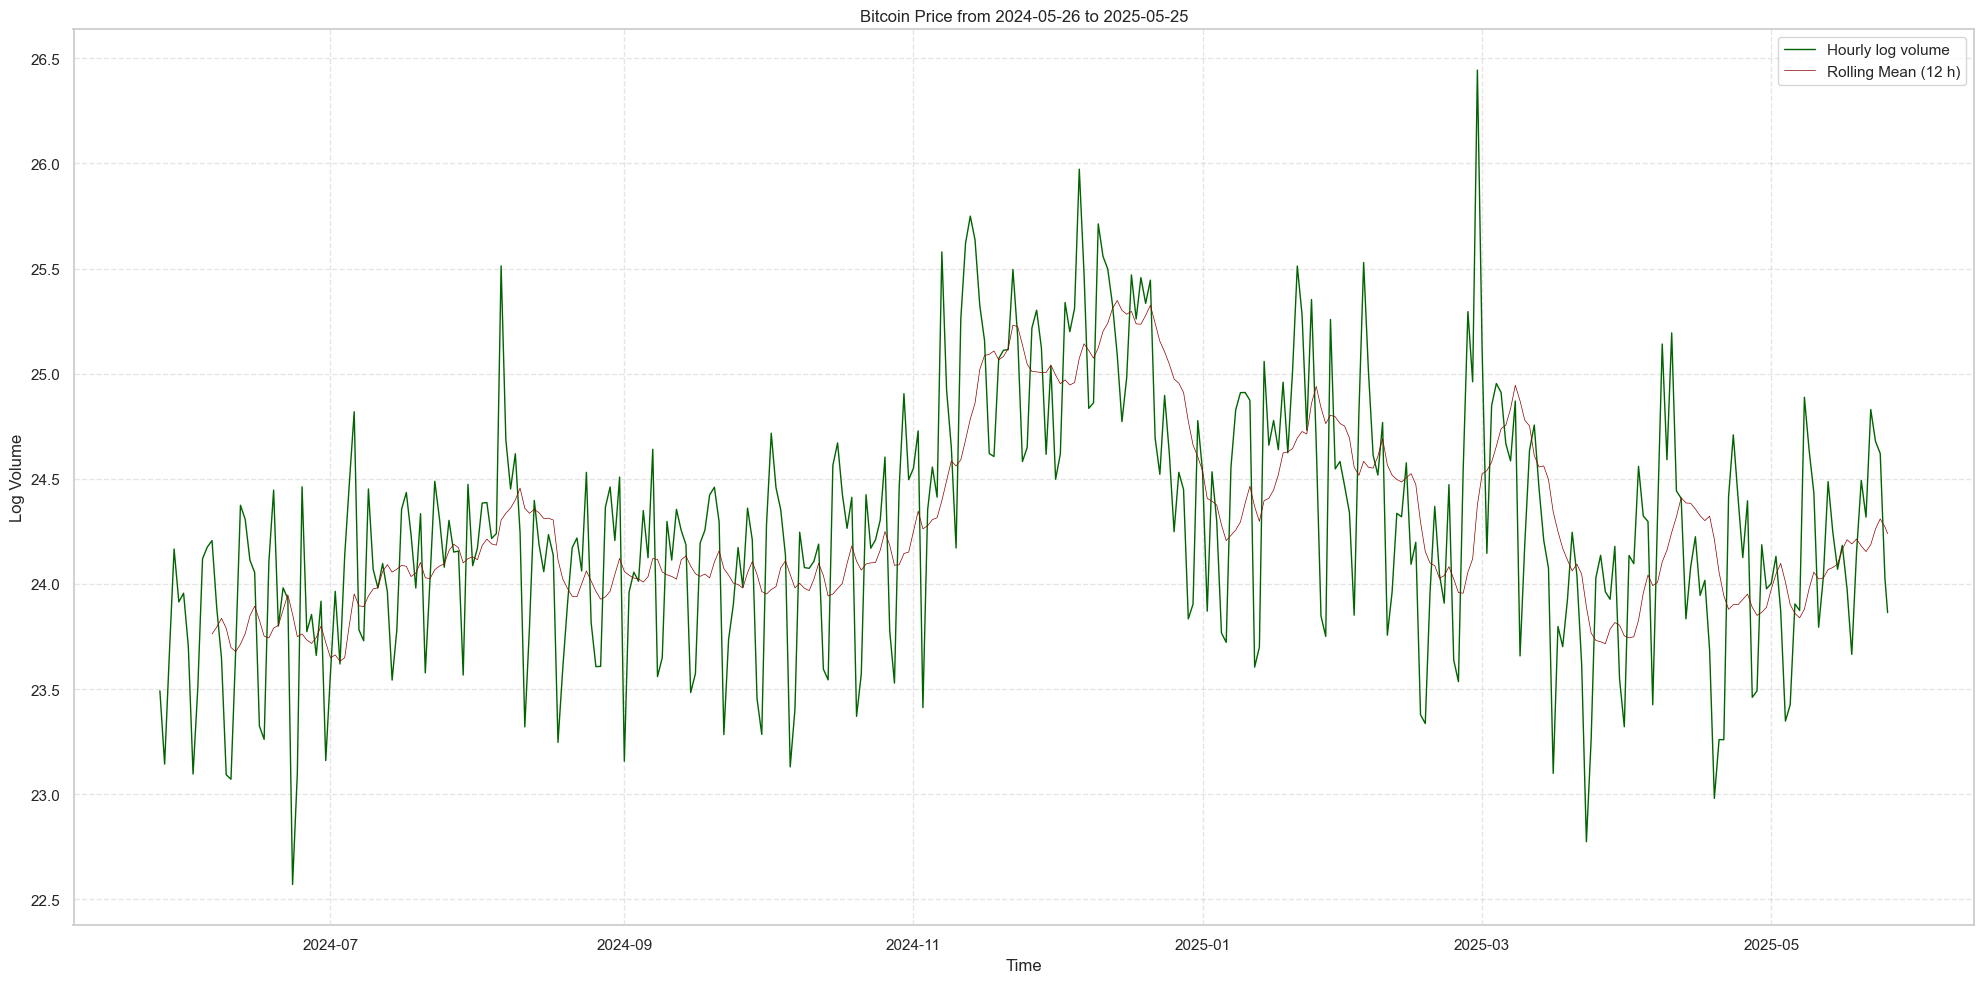

In [17]:
# Handelsvolumen

token = 'bitcoin'
days = 365
window = 24 # In diesem Zeitrahmen wird ein gleitender Durchschnitt berechnet.
log_window = 12 # # In diesem Zeitrahmen wird ein gleitender Durchschnitt der logarithmierten Handelsvolumen berechnet.

df = f.parse_token_data(token=token, days=days)
df['rolling_volume'] = df['volume'].rolling(window=window).mean() # Berechnung des gleitenden Durchschnitts
df['date'] = df.index.date # Die Daten werden extrahiert, um sie auf der X-Achse anzuzeigen.

plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid", palette="muted", font_scale=1)
sns.lineplot(x=df.index, y=df['volume'], label="Volume", linewidth=1, color='darkgreen') # Handelsvolumen
sns.lineplot(x=df.index, y=df['rolling_volume'], label=f"Rolling Mean ({window} h)", linewidth=0.5, color='darkred') # Gleitender Durchschnitt
plt.title(f'{token.capitalize()} Volume from {df.index[0].date()} to {df.index[-1].date()}')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.grid(True, linestyle = '--', alpha=0.5)
plt.tight_layout()
plt.show()


# Handelsvolumen (logarithmiert)

df['log_volume'] = np.log1p(df['volume']) # Berechnung des logarithmierten Handelsvolumens
df['rolling_log_volume'] = df['log_volume'].rolling(window=log_window).mean() # Berechnung des gleitenden Durchschnitts des logarithmierten Handelsvolumens

plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid", palette="muted", font_scale=1)
sns.lineplot(x=df.index, y=df['log_volume'], label="Hourly log volume", linewidth=1, color='darkgreen') # Logarithmiertes Handelsvolumen
sns.lineplot(x=df.index, y=df['rolling_log_volume'], label=f"Rolling Mean ({log_window} h)", linewidth=0.5, color='darkred') # Gleitender Durchschnitt
plt.title(f'{token.capitalize()} Price from {df.index[0].date()} to {df.index[-1].date()}')
plt.xlabel('Time')
plt.ylabel('Log Volume')
plt.grid(True, linestyle = '--', alpha=0.5)
plt.tight_layout()
plt.show()

Zwischen 11.2024 und 01.2025 waren die Verkaufsmengen maximal, obwohl es noch eine Spitze im März 2025 gibt

### Wie ändern sich die Bitcoin Volumen innerhalb eine Woche? Welcher Wochentag sind die Volumen maximal?

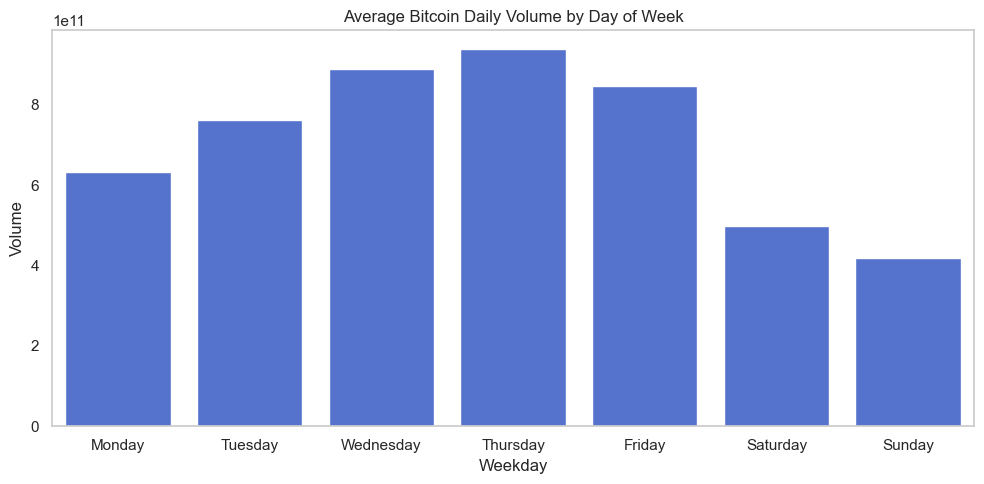

In [18]:
# Handelsvolumen nach Wochentag

token = 'bitcoin'
days = 30

volume_df = f.calculate_volume(token, days)

# Handelsvolumen wird nach Wochentag gruppiert:
grouped = volume_df.groupby('weekday', observed=True)['daily_volume'].mean().reset_index()

sns.set_theme(style='whitegrid', palette='bright', font_scale=1)
plt.figure(figsize=(10,5))
sns.barplot(data=grouped, x='weekday',y='daily_volume', color='royalblue') # Es wird ein Balkendiagramm erstellt.
plt.title(f'Average {token.capitalize()} Daily Volume by Day of Week')
plt.xlabel('Weekday')
plt.ylabel('Volume')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Donnerstags sind die Verkaufsmengen von Bitcoin maximal

### An welchen Tagen und zu welcher Uhrzeit finden die meisten Verhandlungen statt?

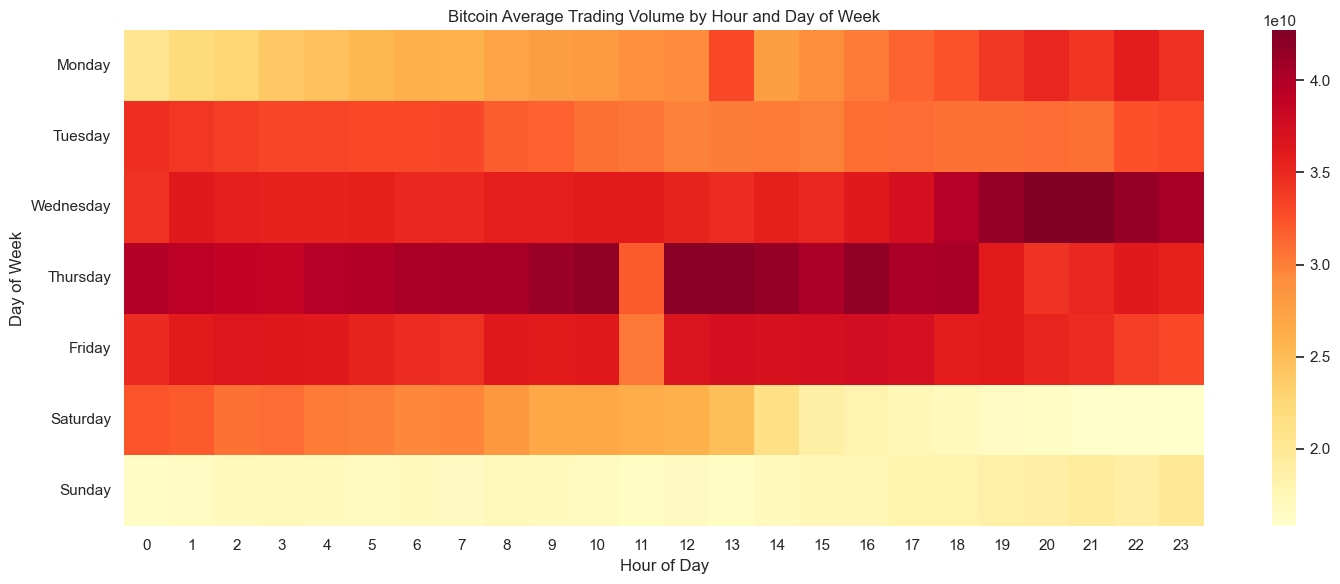

In [19]:
# HITZEKARTE Handelsvolumen nach Wochentag und Uhrzeit

token = 'bitcoin'
days = 30

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df = f.parse_token_data(token, days)
df['weekday'] = df.index.day_name() # Extrahierung des Wochentags
df['hour'] = df.index.hour # Extrahierung der Stunde

# Berechnung des durchschnittlichen Handelsvolumens:
pivot_table = df.pivot_table(index='weekday', columns='hour', values='volume', aggfunc='mean')
pivot_table = pivot_table.reindex(weekday_order) # Umwandlung der Wochentage in die richtige Reihenfolge

plt.figure(figsize=(15,6))
sns.heatmap(pivot_table, cmap='YlOrRd') # Erstellung der Heatmap
plt.title(f'{token.capitalize()} Average Trading Volume by Hour and Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()


Man kann merken, dass Mittwoch- und Donnerstagabend die Trading Volumen maximal waren. Andererseits, sonntags findet kaum Handel statt. Die erhobenen Daten stimmen mit dem vorherigen Balkendiagramm überein, das zeigt, dass die Bitcoin-Handelsvolumen donnerstags am höchsten sind.

Correlation: 0.500958
P_Value: 0.004097


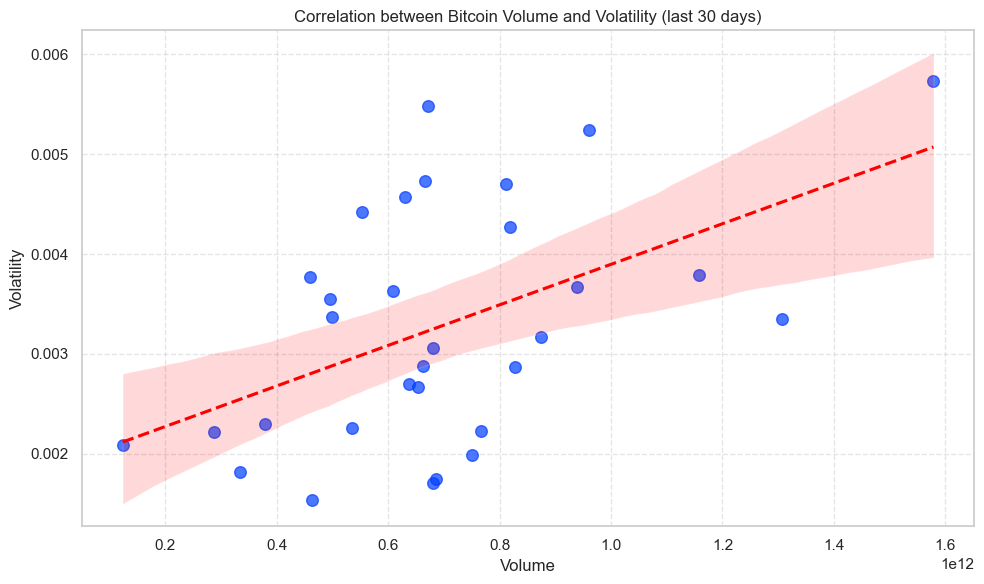

In [20]:
# Korrelation zwischen Volatilität und Handelsvolumen
# Berechnung der Korrelation zwischen Volatilität und Handelsvolumen.
# Die Handelsvolumina und die Volatilität werden in zwei DataFrames gespeichert.
# Der Token und die Anzahl der Tage werden als Parameter übergeben.
# Die beiden DataFrames werden zusammengeführt und die Korrelation zwischen den beiden Variablen wird berechnet.
# Die Korrelation wird mit einem Streudiagramm visualisiert.

token = 'bitcoin'
days = 30

# Berechnung des Handelsvolumens und der Volatilität:
result_volume = f.calculate_volume(token, days)
result_volat = f.calculate_volatility(token, days)

# Zusammenführung der beiden DataFrames:
full_result = pd.merge(result_volume[['date', 'daily_volume','weekday']], result_volat[['date','volatility']],on='date')

plt.figure(figsize=(10,6))
sns.regplot(x='daily_volume', 
            y='volatility', 
            data=full_result, ci=95, # Konfidenzintervall
            scatter_kws={'s' : 70, 'alpha' : 0.7}, # Größe und Transparenz der Punkte
            line_kws={'color': 'red', 'linestyle' : '--'})

plt.title(f'Correlation between {token.capitalize()} Volume and Volatility (last {days} days)')
plt.xlabel('Volume')
plt.ylabel('Volatility')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

corr, p_value = pearsonr(full_result['daily_volume'], full_result['volatility']) # Berechnung der Korrelation
print(f'Correlation: {corr:4f}')
print(f'P_Value: {p_value:4f}') # p-Wert

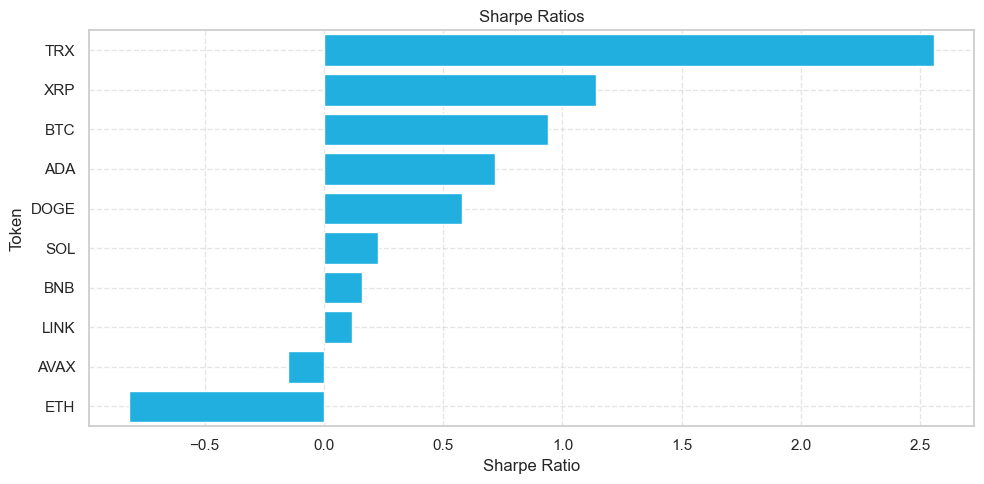

In [21]:
# Berechnung des Sharpe Ratios
# Das Sharpe Ratio ist ein Maß für die risikoadjustierte Rendite eines Portfolios.
# Es wird berechnet, indem die durchschnittliche Rendite des Portfolios durch die Standardabweichung der Renditen geteilt wird.
# Ein höheres Sharpe Ratio deutet auf eine bessere risikoadjustierte Rendite hin.
# In diesem Fall wird das Sharpe Ratio für verschiedene Kryptowährungen berechnet.
# Das Sharpe Ratio wird für jeden Token berechnet und in einem Balkendiagramm dargestellt.

tokens = {'bitcoin': 'BTC', 'ethereum': 'ETH', 'ripple': 'XRP', 'binancecoin': 'BNB', 'solana': 'SOL',
          'dogecoin': 'DOGE', 'cardano': 'ADA', 'tron': 'TRX', 'chainlink': 'LINK', 'avalanche-2': 'AVAX'}
ratios = [f.sharpe_ratio(t) for t in tokens.keys()] # Berechnung des Sharpe Ratios für jeden Token
ratios_dict = dict(sorted(zip(ratios, tokens.values()), reverse=True)) # Umwandlung in ein Dictionary und Sortierung

sns.set_theme(style='whitegrid', palette='bright', font_scale=1)
plt.figure(figsize=(10,5))
sns.barplot(x=ratios_dict.keys(),y=ratios_dict.values(), color='deepskyblue') # Erstellung des Balkendiagramms
plt.title('Sharpe Ratios')
plt.xlabel('Sharpe Ratio')
plt.ylabel('Token')
plt.grid(linestyle = '--', alpha=0.5)
plt.tight_layout()
plt.show()

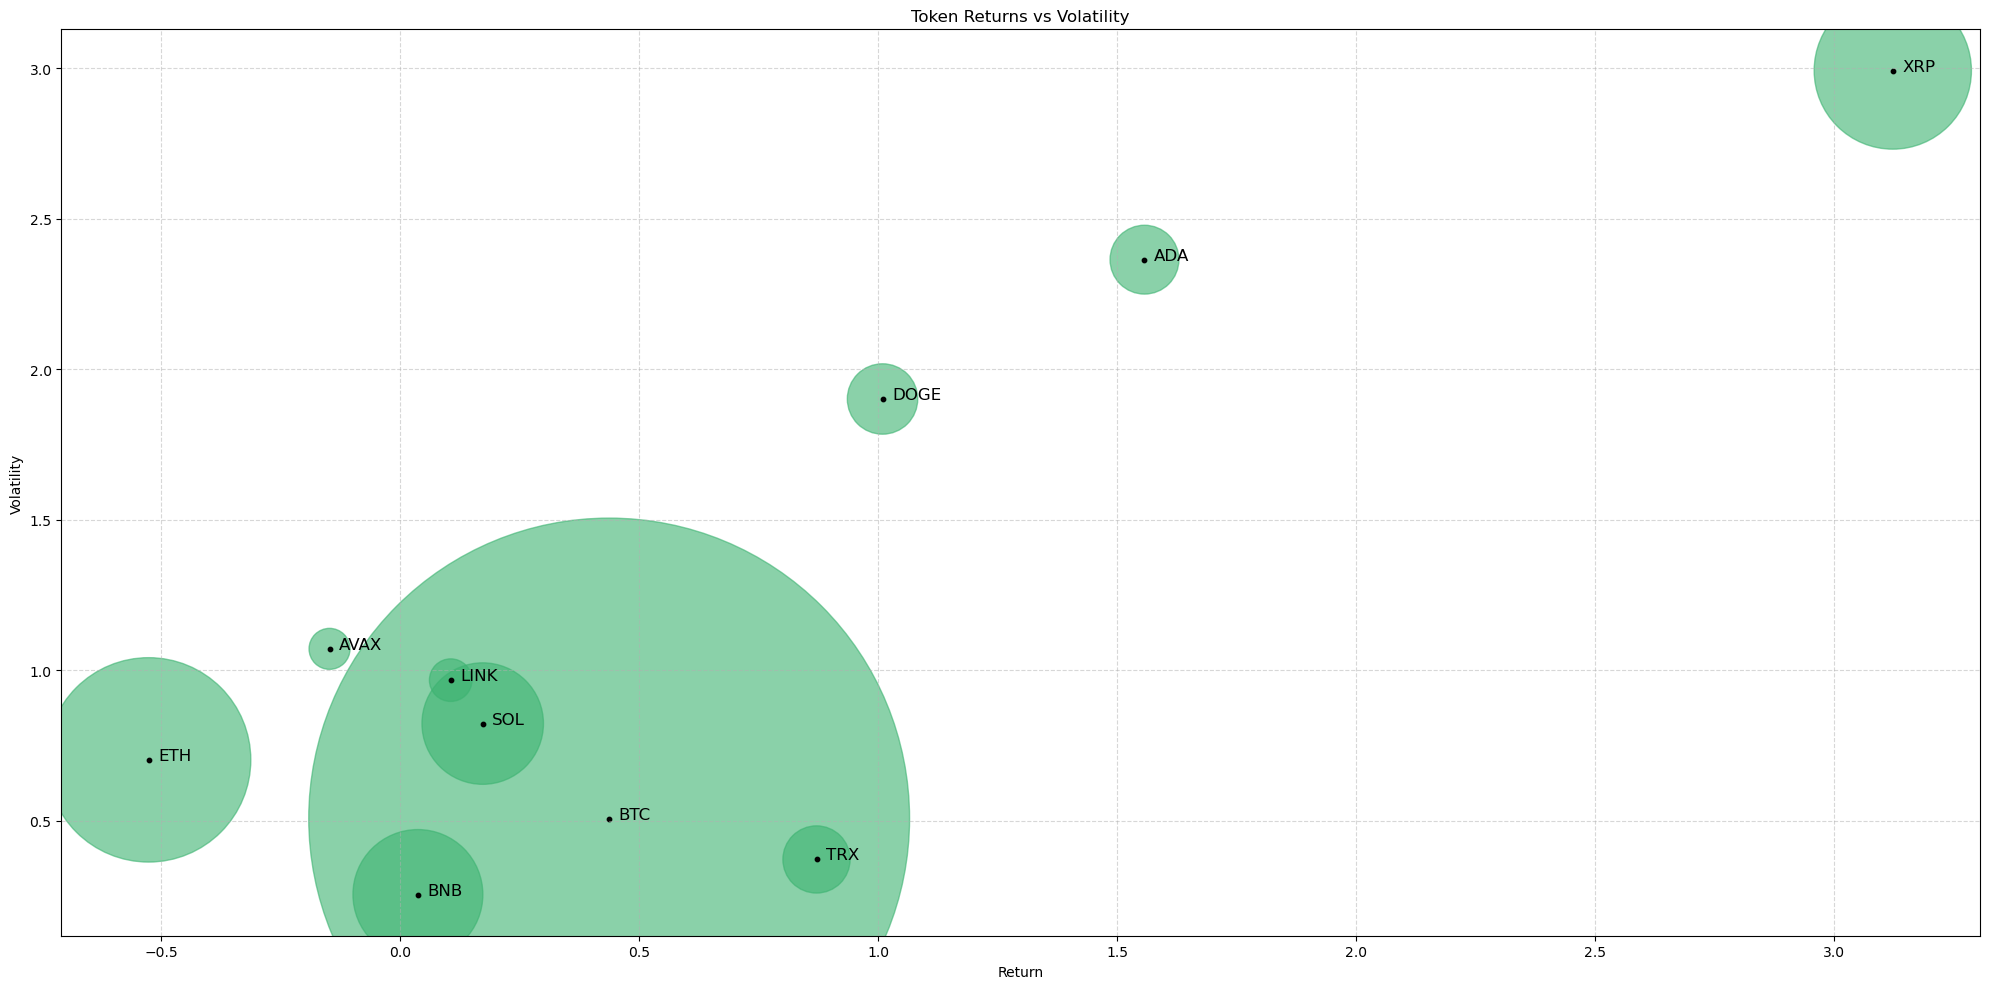

In [12]:
# Rendite und Volatilität der Token
# Es werden die jährlichen Renditen und Volatilitäten verschiedener Token berechnet und in einem Streudiagramm dargestellt.
# Die Marktkapitalisierung der Token wird ebenfalls berücksichtigt, um die Größe der Punkte im Streudiagramm darzustellen.

tokens = {'bitcoin': 'BTC', 'ethereum': 'ETH', 'ripple': 'XRP', 'binancecoin': 'BNB', 'solana': 'SOL',
          'dogecoin': 'DOGE', 'cardano': 'ADA', 'tron': 'TRX', 'chainlink': 'LINK', 'avalanche-2': 'AVAX'}

data = [f.parse_token_data(token, 365) for token in tokens.keys()]
returns = [] # Liste für die Renditen
volatilities = [] # Liste für die Volatilitäten
market_caps = [] # Liste für die Marktkapitalisierungen

for df_token in data:
    df_first_days = df_token[df_token.index.day == 1] # Filtern der Daten für die ersten Tage des Monats
    df_first_days = df_first_days.copy() # Kopieren der Daten, um eine Warnung zu vermeiden
    df_first_days['return'] = df_first_days['price'].pct_change() # Berechnung der monatlichen Rendite

    total_return = df_first_days['return'].sum() # Berechnung der durchschnittlichen Rendite
    volatility = df_first_days['return'].std() * 12 ** 0.5 # Berechnung der jährlichen Volatilität
    market_cap = df_first_days['market_cap'].iloc[-1] # Letzte Marktkapitalisierung Jahres

    returns.append(total_return)
    volatilities.append(volatility)
    market_caps.append(market_cap)

market_caps = [market_cap / 10e6 for market_cap in market_caps] # Normalisierung der Marktkapitalisierung für bessere Visualisierung
plt.figure(figsize=(20, 10))
plt.scatter(returns, volatilities, s=market_caps, alpha=0.6, color='mediumseagreen') # Erstellung des Streudiagramms
plt.scatter(returns, volatilities, s=10, color='black') # Hinzufügen von Punkten für bessere Sichtbarkeit

for token, x, y in zip(tokens.values(), returns, volatilities): # Hinzufügen von Textbeschriftungen für die Token
    plt.text(x + 0.02, y, token, fontsize=12)

plt.xlabel('Return')
plt.ylabel('Volatility')
plt.title('Token Returns vs Volatility')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()